# MSC Computational Wokshop - Goals

In this workshop we are going to write elementary molecular simulations to explore the statistical mechanics of many-particle systems.

We are going to use `Python` and exploit all the advantages of dedicated scientific computing libraries. Specifically:
- `numpy` , https://numpy.org/
- `scipy` , https://scipy.org/
- `numba`, https://numba.pydata.org/
- `matplotlib`, https://matplotlib.org/

The advanced goal will be to construct a small web-application. For this purpose - time permitting - we will employ `Bokeh` , https://bokeh.org/  that we will eventually dploy (for example on `Render` https://render.com or `Heroku` https://heroku.com ).

An example application can be found here https://kinetic-gas.onrender.com/



## Basics

Before starting coding, let us revisit some background.

### Numpy

Numpy is *the* key numerical library in Python. It is centered on array manipulation, which it does much more efficiently than pure Python.

Let's show this with an example. We use the `time` library to benchmark our code.

In [4]:
import time

In [5]:
start = time.time()

# pure python sum over the first 1 000 000 integers

s = 0
for i in range(1_000_000):
    s+=i

print(s)
end = time.time()
pure_time = end-start
print("pure Python, total time in seconds", pure_time)

499999500000
pure Python, total time in seconds 0.13213276863098145


We import `numpy` like this

In [6]:
import numpy as np

and generate an `array` of integers and sum over it like this

In [7]:
start = time.time()
integers = np.arange(1000000).sum()
end = time.time()
numpy_time = end-start
print("Python+numpy, total time in seconds", numpy_time)

Python+numpy, total time in seconds 0.0064656734466552734


The corresponding speedup is rather significant:

In [8]:
pure_time/numpy_time

20.43604115195988

&rarr; **USE NUMPY!**

#### Key concepts

##### Generating arrays

In [9]:
minimum = -20.0
maximum = 30.0

#known step
step = 0.01
array_with_known_step = np.arange(minimum, maximum,step)
#known number of points
n = 10
array_with_known_n = np.linspace(minimum, maximum,n)

In [10]:
array_with_known_step

array([-20.  , -19.99, -19.98, ...,  29.97,  29.98,  29.99])

In [11]:
array_with_known_n

array([-20.        , -14.44444444,  -8.88888889,  -3.33333333,
         2.22222222,   7.77777778,  13.33333333,  18.88888889,
        24.44444444,  30.        ])

##### Sizing and resizing

In [12]:
array_with_known_n.size

10

In [13]:
array_with_known_step.shape

(5000,)

In [14]:
reshaped = array_with_known_n.reshape((int(n/2),2))
print(reshaped)

[[-20.         -14.44444444]
 [ -8.88888889  -3.33333333]
 [  2.22222222   7.77777778]
 [ 13.33333333  18.88888889]
 [ 24.44444444  30.        ]]


In [15]:
reshaped.shape

(5, 2)

##### Slicing

In [16]:
# selecting the first column
reshaped[:,0]

array([-20.        ,  -8.88888889,   2.22222222,  13.33333333,
        24.44444444])

In [17]:
# selectign  the last row 
reshaped[-1,:]

array([24.44444444, 30.        ])

In [18]:
# selecting even rows
reshaped[::2,:]

array([[-20.        , -14.44444444],
       [  2.22222222,   7.77777778],
       [ 24.44444444,  30.        ]])

In [19]:
# reversing the order of the columns
reshaped[:,::-1]

array([[-14.44444444, -20.        ],
       [ -3.33333333,  -8.88888889],
       [  7.77777778,   2.22222222],
       [ 18.88888889,  13.33333333],
       [ 30.        ,  24.44444444]])

##### Random numbers

To generate random numbers, you need a `generator`. This is an object capable of producing random numbers from a variety of different distributions.

In [20]:
rng = np.random.default_rng()

In [21]:
uniform_array = rng.uniform(-1,1,10000)
normal_array = rng.normal(1,2, 10000)
exponential_array = rng.exponential(2.0,10000)

samples = [uniform_array, normal_array, exponential_array]


Let's use `matplotlib` to plot the distributions.

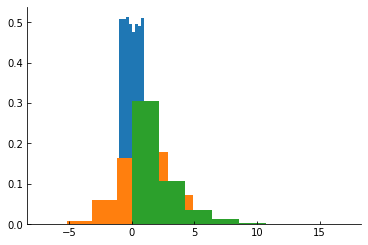

In [22]:
import matplotlib.pyplot as plt

for sample in samples:
    plt.hist(sample, bins = 8, density=True)

**Exercise 1**

Improve the rendering of the plot above using an array for the `bins` parameter.

**Exercise 2**

Explore the methods of the sample arrays to calculate their statistical properties, e.g. mean, standard deviation, variance etc.

**Exercise 3**

Select only positive entries from the array `uniform_array`.

##### Linear algebra

In [28]:
#  random 2d vectors

N = 4
d  = 2
r = rng.uniform(0,1,(N,d))

In [58]:
# norm of a vector
norms = np.linalg.norm(r, axis=1)

(-0.03872033637543742,
 0.8131270638841857,
 -0.03067306247965264,
 0.6441343120727054)

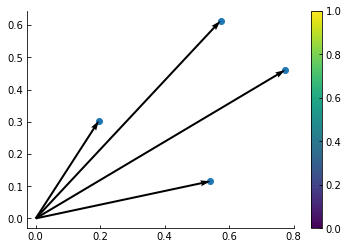

In [57]:
#plotting  the vectors
plt.scatter(r[:,0],r[:,1])
plt.quiver(np.zeros(N),np.zeros(N), r[:,0],r[:,1], scale=1, scale_units='xy',angles='xy')
plt.axis('equal')

**Exercise 4**

Change the plot above to color the arrows according to their length.